In [ ]:
pip install ImageDataGenerator

ERROR: Could not find a version that satisfies the requirement ImageDataGenerator (from versions: none)
ERROR: No matching distribution found for ImageDataGenerator


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Activation,BatchNormalization,Input,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
!kaggle datasets download -d tapakah68/facial-emotion-recognition

Dataset URL: https://www.kaggle.com/datasets/tapakah68/facial-emotion-recognition
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 421M/433M [00:06<00:00, 117MB/s]
100% 433M/433M [00:06<00:00, 72.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/facial-emotion-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Define constants
DATA_DIR = '/content/images/'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

In [ ]:
# Function to load and preprocess images
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)

In [ ]:
# Load the data
images, labels = load_data()


In [ ]:
len(images)

64

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
print(images.shape)
print(labels.shape)

(64, 48, 48)
(64,)


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(51, 48, 48, 1)
(13, 48, 48, 1)


In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)

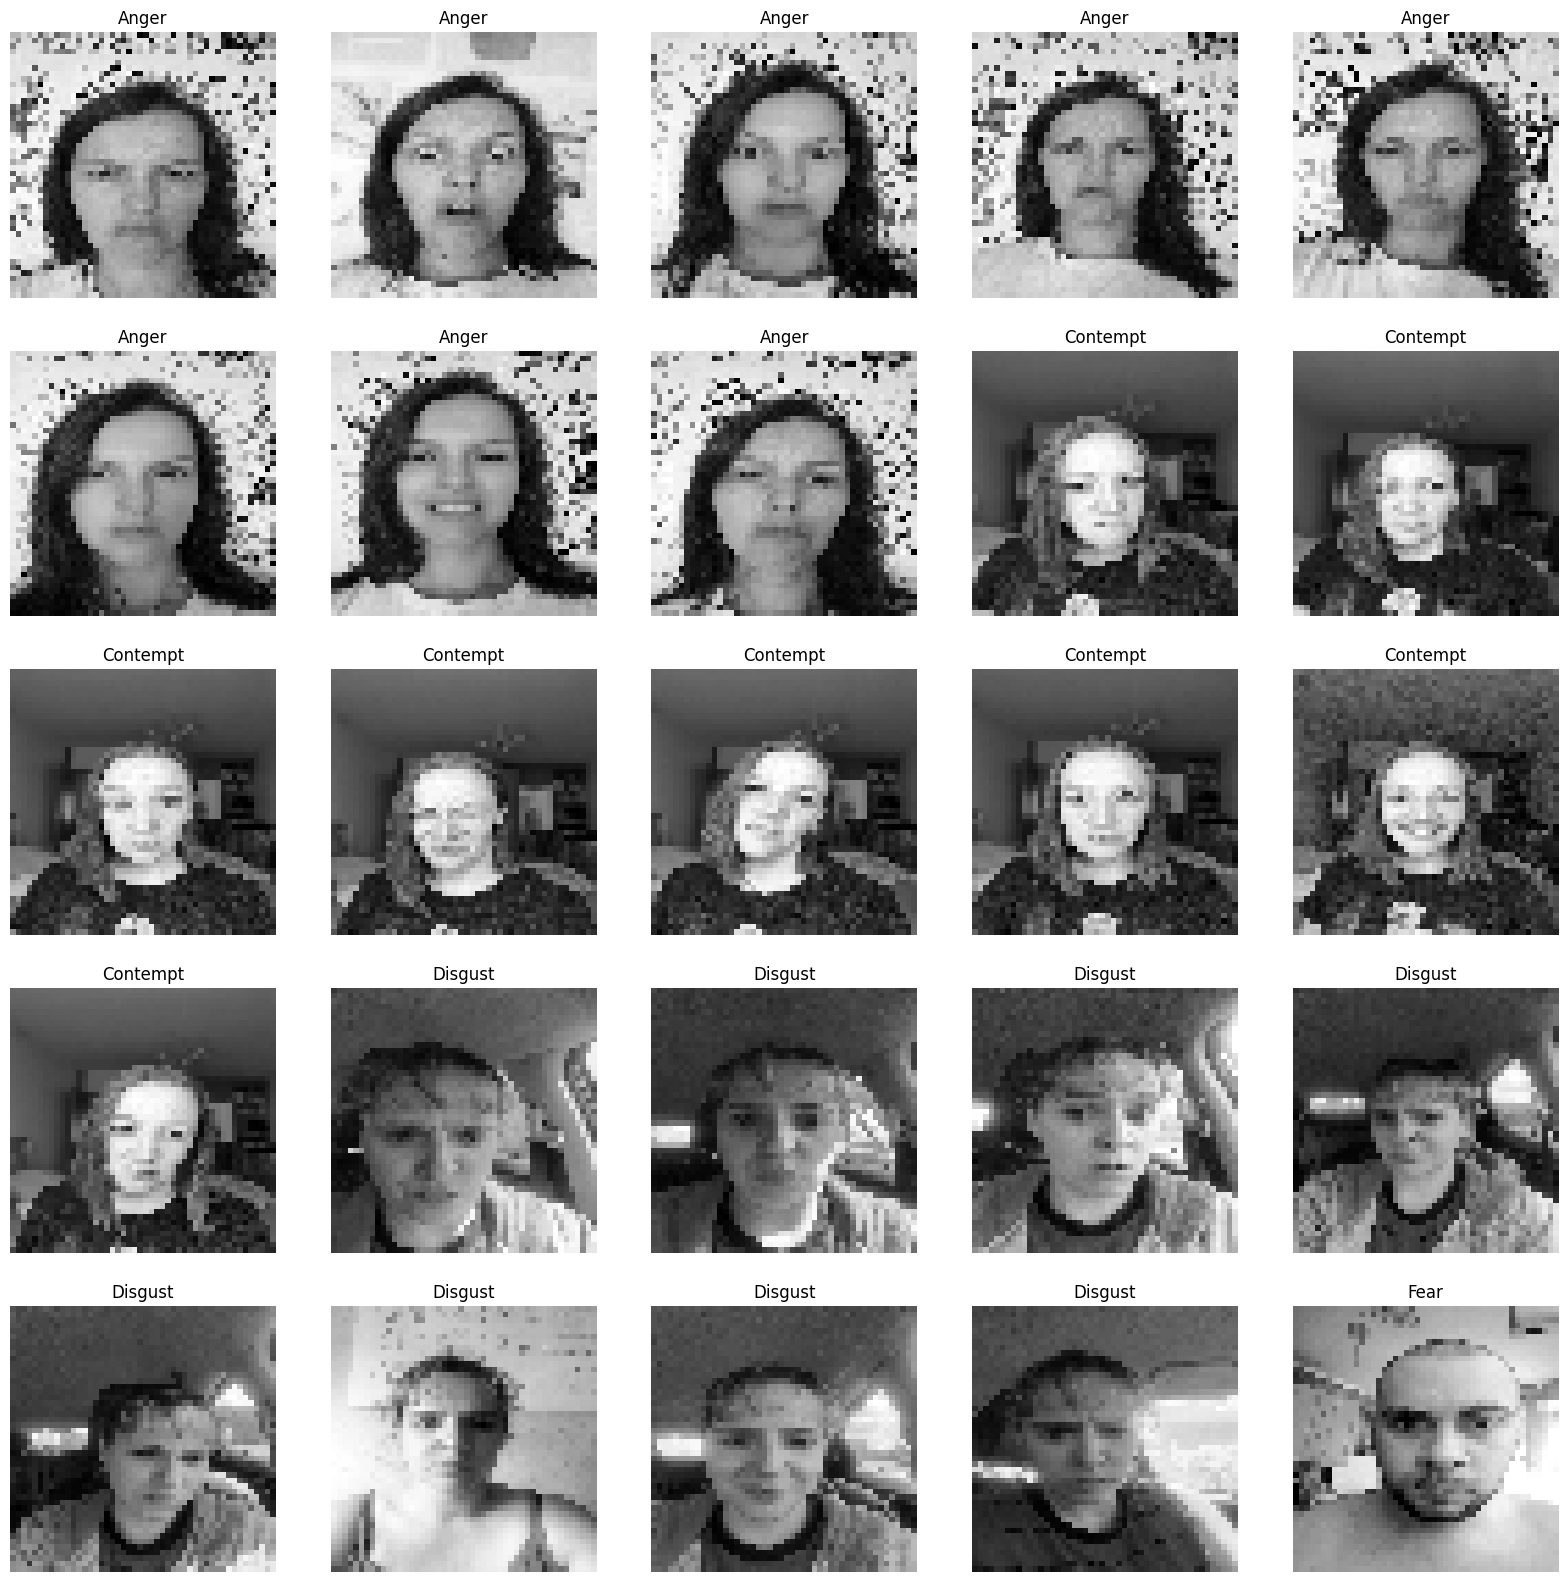

In [ ]:
# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
#Model Building
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,461,992 (5.58 MB)

 Trainable params: 1,461,992 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 1.0000 - loss: 5.1849e-04 - val_accuracy: 1.0000 - val_loss: 8.6224e-04
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 1.0000 - loss: 4.9905e-04 - val_accuracy: 1.0000 - val_loss: 8.0351e-04
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 1.0000 - loss: 3.5939e-04 - val_accuracy: 1.0000 - val_loss: 8.7276e-04
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 1.0000 - loss: 3.7794e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 3.6842e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 1.0000 - loss: 3.7587e-04 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 1.0000 - loss: 3.8958e-04 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 1.0000 - loss: 3

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 - 0s - 54ms/step - accuracy: 1.0000 - loss: 0.0014
Test Loss: 0.0013528874842450023
Test Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Convert y_test from one-hot encoding to label indices
y_test_labels = y_test.argmax(axis=1)

# Print classification report
print(classification_report(y_test_labels, predicted_labels, target_names=EMOTIONS))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
     Disgust       1.00      1.00      1.00         1
        Fear       1.00      1.00      1.00         1
       Happy       1.00      1.00      1.00         1
     Neutral       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         1
   Surprised       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


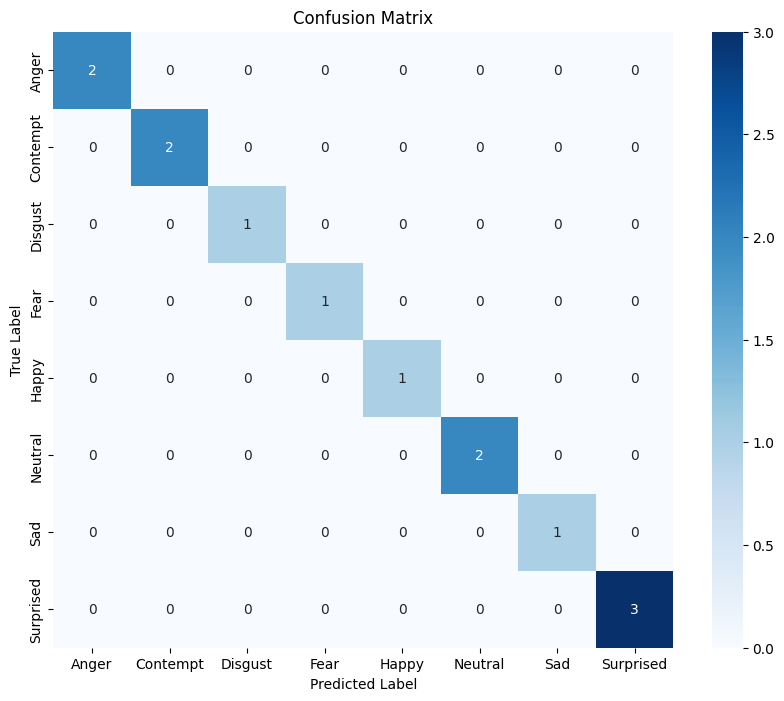

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

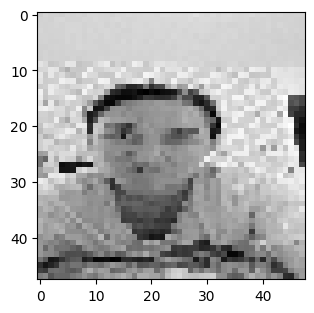

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Function to display images with predicted and actual labels
def display_images(images, actual_labels, predicted_labels, emotions, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        # Since the images are grayscale, we reshape them to (48, 48)
        img = images[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {emotions[actual_labels[i]]}\nPredicted: {emotions[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Display the images with predicted and actual labels
display_images(X_test, y_test, predicted_labels, EMOTIONS)

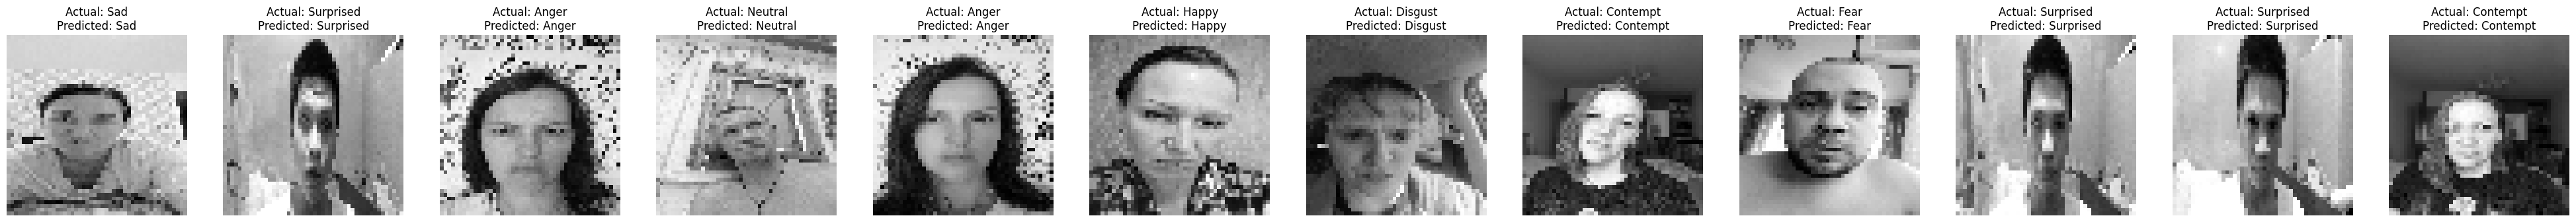

In [ ]:
def display_images(images, actual_labels, predicted_labels, emotions, num_images=12):
    actual_labels = actual_labels.argmax(axis=1)  # Convert one-hot encoded labels to class indices
    plt.figure(figsize=(50, 50))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        img = images[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {emotions[actual_labels[i]]}\nPredicted: {emotions[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Now call the function
display_images(X_test, y_test, predicted_labels, EMOTIONS)